In [29]:
import requests


headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:60.0) Gecko/20100101 Firefox/60.0",
           "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
           "Accept-Language": "en-US,en;q=0.9"
           }


image_url = 'https://d9jhi50qo719s.cloudfront.net/32d/samples/5hq_800.png?230827101227'
imgname = 'foto.jpg'
img_data = requests.get(url=image_url, headers=headers).content

r = requests.get(image_url, allow_redirects=True)
open(imgname, 'wb').write(r.content)

120986

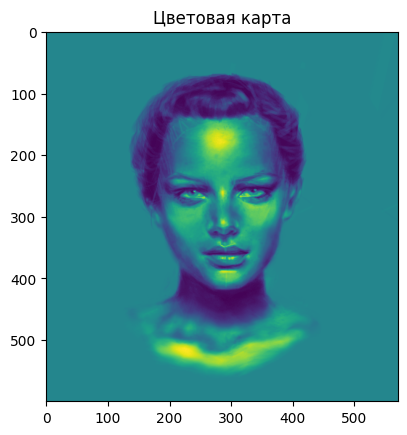

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(imgname)
plt.imshow(img[:, :, 0])
plt.title('Цветовая карта')
plt.show()

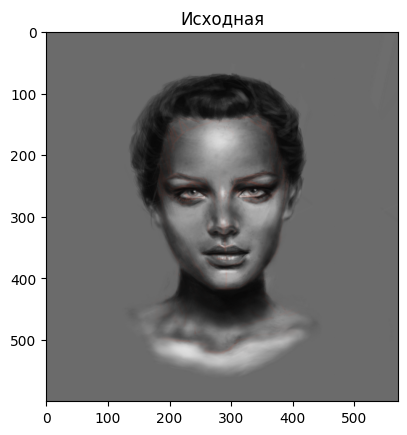

In [31]:
# imgplot = plt.imshow(img, cmap=plt.cm.gray)
imgplot = plt.imshow(img)
plt.title('Исходная')
plt.show()

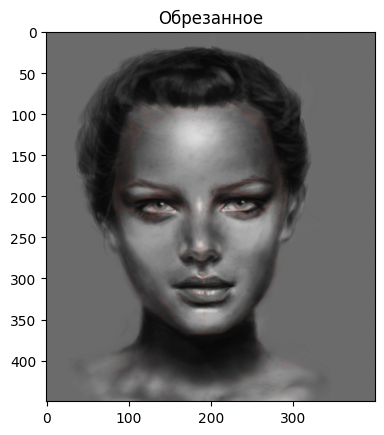

In [32]:
crop_img = img[50:500, 100:500]
plt.imshow(crop_img, cmap="gray")
plt.title('Обрезанное')
plt.show()

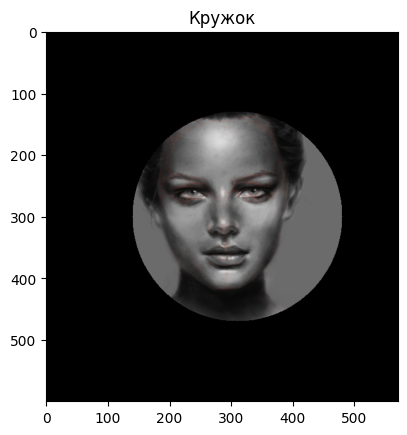

In [33]:
import numpy as np
from PIL import Image
img = np.array(Image.open(imgname))
sy, sx, sz = img.shape
y, x = np.ogrid[0:sy, 0:sx] # x и y обозначают пиксели
y.shape, x.shape

centerx, centery = (310, 300) # центр изображения
mask = ((y - centery)**2 + (x - centerx)**2) > 170**2 # круг
img[mask] = 0
plt.title('Кружок')
plt.imshow(img)

In [34]:
import requests
url = 'https://scipy-lectures.org/_downloads/populations.txt'
response = requests.get(url)
text_data = response.text

filename = 'populations.txt'

with open(filename, 'w') as file:
    file.write(text_data)

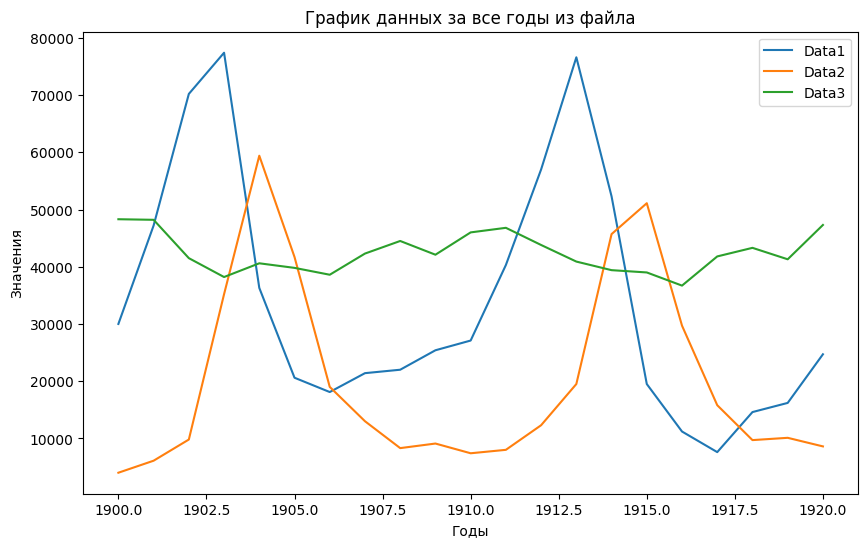

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных из файла
data = np.loadtxt('https://scipy-lectures.org/_downloads/populations.txt')

# Извлечение данных для каждой колонки
years = data[:, 0]
data1 = data[:, 1]
data2 = data[:, 2]
data3 = data[:, 3]

# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(years, data1, label='Data1')
plt.plot(years, data2, label='Data2')
plt.plot(years, data3, label='Data3')

# Добавление заголовков и меток
plt.title('График данных за все годы из файла')
plt.xlabel('Годы')
plt.ylabel('Значения')
plt.legend()  # Добавление легенды

# Отображение графика
plt.show()

In [36]:
# Среднее и стандартное отклонение
mean_data1, std_data1 = np.mean(data1), np.std(data1)
mean_data2, std_data2 = np.mean(data2), np.std(data2)
mean_data3, std_data3 = np.mean(data3), np.std(data3)

print(f"Среднее и стандартное отклонение для Data1: {mean_data1}, {std_data1}")
print(f"Среднее и стандартное отклонение для Data2: {mean_data2}, {std_data2}")
print(f"Среднее и стандартное отклонение для Data3: {mean_data3}, {std_data3}")

Среднее и стандартное отклонение для Data1: 34080.95238095238, 20897.906458089667
Среднее и стандартное отклонение для Data2: 20166.666666666668, 16254.591536908763
Среднее и стандартное отклонение для Data3: 42400.0, 3322.5062255844787


In [37]:
max_year_data1 = years[np.argmax(data1)]
max_year_data2 = years[np.argmax(data2)]
max_year_data3 = years[np.argmax(data3)]

print(f"Год с наибольшей популяцией для Data1: {max_year_data1}")
print(f"Год с наибольшей популяцией для Data2: {max_year_data2}")
print(f"Год с наибольшей популяцией для Data3: {max_year_data3}")

Год с наибольшей популяцией для Data1: 1903.0
Год с наибольшей популяцией для Data2: 1904.0
Год с наибольшей популяцией для Data3: 1900.0


In [38]:
max_species_each_year = np.array(['H', 'L', 'C'])[np.argmax(data[:, 1:], axis=1)]
print(f"Вид с наибольшей популяцией за каждый год: {max_species_each_year}")

Вид с наибольшей популяцией за каждый год: ['C' 'C' 'H' 'H' 'L' 'L' 'C' 'C' 'C' 'C' 'C' 'C' 'H' 'H' 'H' 'L' 'C' 'C'
 'C' 'C' 'C']


In [39]:
years_above_50000 = years[np.all(data[:, 1:] > 50000, axis=1)]
print(f"Годы, когда все популяции превышают 50000: {years_above_50000}")

Годы, когда все популяции превышают 50000: []


In [40]:
top2_lowest_years_data1 = years[np.argsort(data1)[:2]]
top2_lowest_years_data2 = years[np.argsort(data2)[:2]]
top2_lowest_years_data3 = years[np.argsort(data3)[:2]]

print(f"Топ 2 года с самыми низкими популяциями для Data1: {top2_lowest_years_data1}")
print(f"Топ 2 года с самыми низкими популяциями для Data2: {top2_lowest_years_data2}")
print(f"Топ 2 года с самыми низкими популяциями для Data3: {top2_lowest_years_data3}")

Топ 2 года с самыми низкими популяциями для Data1: [1917. 1916.]
Топ 2 года с самыми низкими популяциями для Data2: [1900. 1901.]
Топ 2 года с самыми низкими популяциями для Data3: [1916. 1903.]


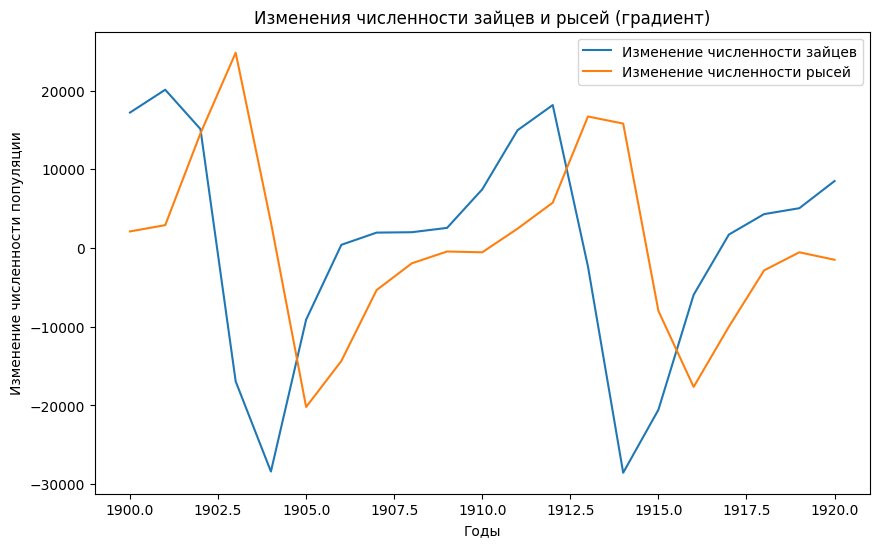

Корреляция между изменениями численности зайцев и рысей: -0.05136252586288724


In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных из файла
data = np.loadtxt('https://scipy-lectures.org/_downloads/populations.txt')

# Извлечение данных для каждой колонки
years = data[:, 0].astype(int)
hares_population = data[:, 1]
lynxes_population = data[:, 2]

# Вычисление изменений численности с использованием np.gradient
hares_gradient = np.gradient(hares_population, years)
lynxes_gradient = np.gradient(lynxes_population, years)

# График изменений численности зайцев и рысей
plt.figure(figsize=(10, 6))
plt.plot(years, hares_gradient, label='Изменение численности зайцев')
plt.plot(years, lynxes_gradient, label='Изменение численности рысей')
plt.title('Изменения численности зайцев и рысей (градиент)')
plt.xlabel('Годы')
plt.ylabel('Изменение численности популяции')
plt.legend()
plt.show()

# Корреляция между изменениями численности зайцев и рысей
correlation_gradient = np.corrcoef(hares_gradient, lynxes_gradient)[0, 1]
print(f"Корреляция между изменениями численности зайцев и рысей: {correlation_gradient}")

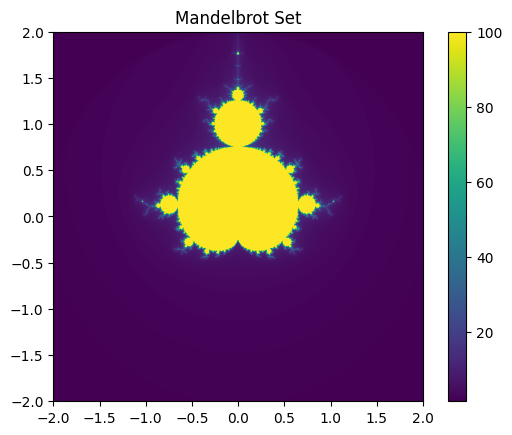

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z**2 + c
        n += 1
    if n == max_iter:
        return max_iter
    return n + 1 - np.log(np.log2(abs(z)))

def draw_mandelbrot(width, height, x_min, x_max, y_min, y_max, max_iter):
    image = np.zeros((width, height))

    for x in range(width):
        for y in range(height):
            real = x_min + x * (x_max - x_min) / (width - 1)
            imaginary = y_min + y * (y_max - y_min) / (height - 1)
            c = complex(real, imaginary)
            color = mandelbrot(c, max_iter)
            image[x, y] = color

    plt.imshow(image, cmap='viridis', extent=(x_min, x_max, y_min, y_max))
    plt.colorbar()
    plt.title('Mandelbrot Set')
    plt.savefig('mandelbrot.png')
    plt.show()

# Задаем параметры
width, height = 800, 800
x_min, x_max = -2, 2
y_min, y_max = -2, 2
max_iter = 100
# Рисуем множество Мандельброта
draw_mandelbrot(width, height, x_min, x_max, y_min, y_max, max_iter)